In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Img ファイルの different_shapes.png の好きな図形を長方形の枠で囲む

In [2]:
img1 = cv2.imread("C:\\Users\\koudaisei\\kawamura\\img\\different_shapes.png")

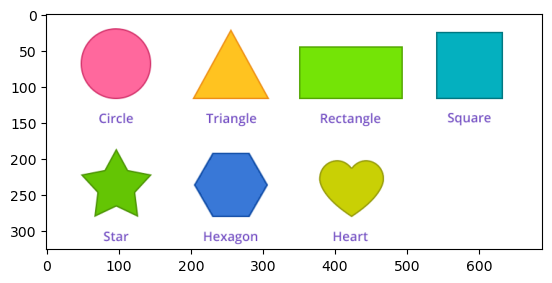

In [3]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

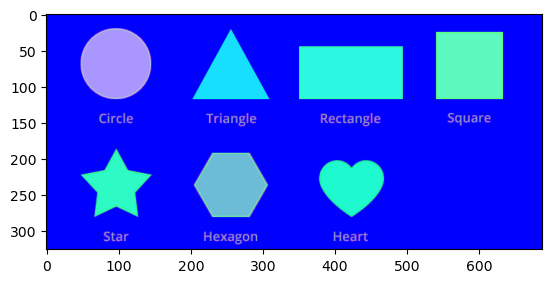

In [4]:
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
plt.imshow(img1_hsv)

In [5]:
img1_hsv[230, 100]

array([ 45, 250, 197], dtype=uint8)

In [6]:
H = 5
S = 20
V = 30

In [7]:
upper = np.array([45+H, 250+S, 197+V])
lower = np.array([45-H, 250-S, 197-V])

In [8]:
img1_range = cv2.inRange(img1_hsv, lower, upper)

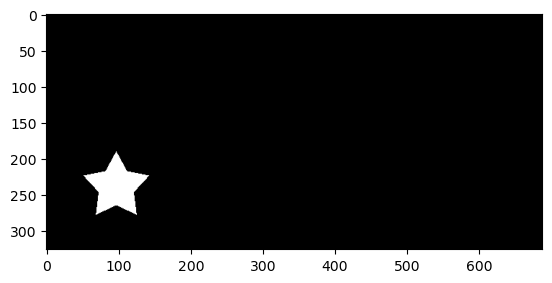

In [9]:
plt.imshow(img1_range, "gray")

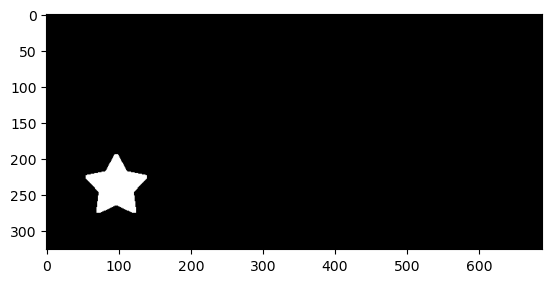

In [10]:
kernel = np.ones((5, 5), np.uint8)
img1_erode = cv2.erode(img1_range, kernel)
img1_dilate = cv2.dilate(img1_erode, kernel)
plt.imshow(img1_dilate, "gray")

In [11]:
contours, hierarchy = cv2.findContours(img1_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

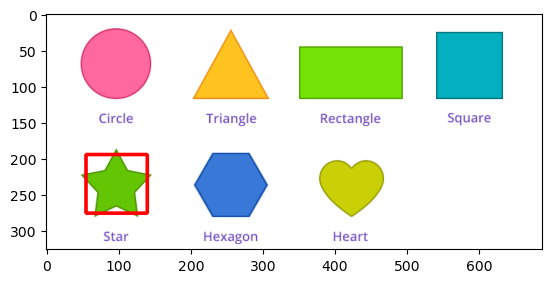

In [12]:
for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    
    img1_rect = cv2.rectangle(img1_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img1_rgb)

### 2. 複数の種類の果物が写っている画像を用意し、好きな果物の画像を長方形の枠で囲む

In [13]:
img2 = cv2.imread("C:\\Users\\koudaisei\\kawamura\\img\\fruit.jpg")

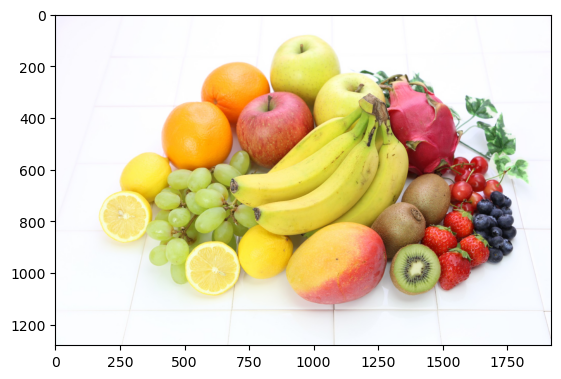

In [14]:
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

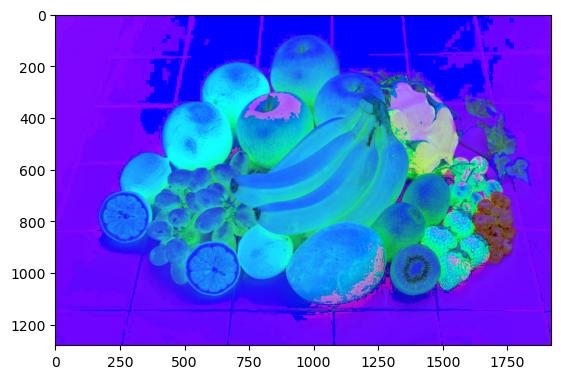

In [15]:
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
plt.imshow(img2_hsv)

In [16]:
img2_hsv[800, 1700]

array([115,  57,  80], dtype=uint8)

In [17]:
H = 5
S = 20
V = 30

In [18]:
upper = np.array([115+H, 57+S, 80+V])
lower = np.array([115-H, 57-S, 80-V])

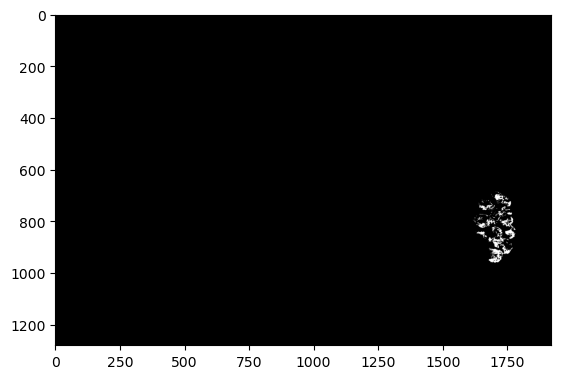

In [19]:
img2_range = cv2.inRange(img2_hsv, lower, upper)
plt.imshow(img2_range, "gray")

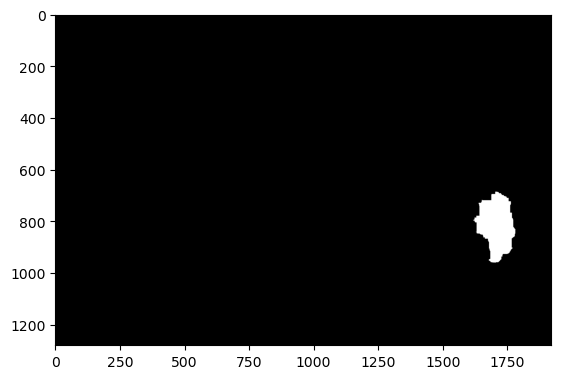

In [20]:
kernel = np.ones((5, 5), np.uint8)
img2_dilate = cv2.dilate(img2_range, kernel, iterations=7)
img2_erode = cv2.erode(img2_dilate, kernel, iterations=7)
plt.imshow(img2_erode, "gray")

In [21]:
contours, hierarchy = cv2.findContours(img2_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

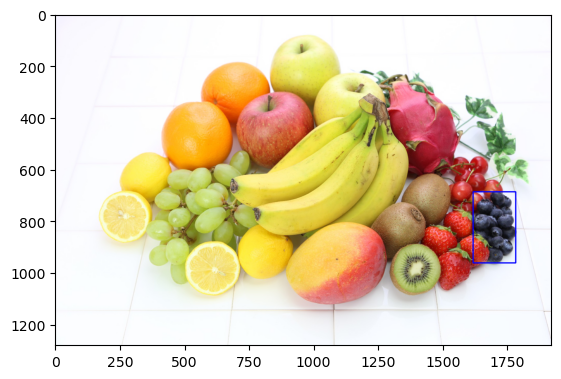

In [22]:
for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    
    img2_rect = cv2.rectangle(img2_rgb, (x, y), (x+w, y+h), (0, 0, 255), 3)
plt.imshow(img2_rgb)

3. cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_TREE, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE について調べる 

### 4. cv2.inRange 関数を自分作ってみる

In [23]:
def my_range(img, height, width, H, S, V, size, count):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    h, s, v = img_hsv[height, width]

    upper = np.array([h+H, s+S, v+V])
    lower = np.array([h-H, s-S, v-V])

    img_range = cv2.inRange(img_hsv, lower, upper)

    kernel = np.ones((size, size), np.uint8)
    img_erode = cv2.erode(img_range, kernel, iterations=count)
    img_dilate = cv2.dilate(img_erode, kernel, iterations=count)

    contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for each_contour in contours:
        x, y, w, h = cv2.boundingRect(each_contour)
        ing_rect = cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
    plt.imshow(img_rgb)

In [24]:
img = cv2.imread("C:\\Users\\koudaisei\\kawamura\\img\\fruit.jpg")
height = 800
width  = 1300
H      = 5
S      = 30
V      = 30
size   = 5
count  = 1

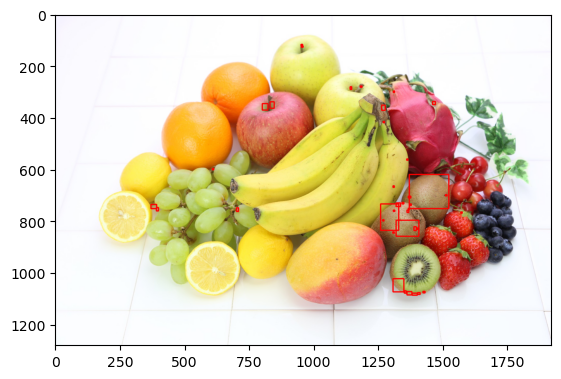

In [25]:
my_range(img, height, width, H, S, V, size, count)